In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import pandas as pd
from collections import defaultdict
import re

def analyze_plates_statistics(
    data_dir="/proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/first_frames",
    show_hist=False,
    show_summary_plot=True
):
    """
    Analyzes image statistics grouped by plate.
    
    Args:
        data_dir (str): Directory containing the first frame images
        show_hist (bool): If True, displays histograms for each plate
        show_summary_plot (bool): If True, displays a bar chart of mean/std by plate
    
    Returns:
        pd.DataFrame: DataFrame with statistics for each plate
    """
    # Get all image files
    image_files = [f for f in os.listdir(data_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Group images by plate
    plate_images = defaultdict(list)
    
    for img_file in image_files:
        # Extract plate name (e.g., LT0001_12 from LT0001_12-00325_01.png)
        match = re.match(r'(LT\d+_\d+)', img_file)
        if match:
            plate_name = match.group(1)
            plate_images[plate_name].append(os.path.join(data_dir, img_file))
    
    # Calculate statistics for each plate
    plate_stats = []
    
    for plate_name, image_paths in plate_images.items():
        print(f"\nAnalyzing plate: {plate_name} ({len(image_paths)} images)")
        
        # Initialize arrays to store statistics
        all_means = []
        all_stds = []
        all_mins = []
        all_maxs = []
        all_pixel_values = []
        
        # Process each image in the plate
        for img_path in image_paths:
            try:
                image = imageio.imread(img_path)
                
                # Convert to float64 for accurate calculations
                image_float64 = image.astype(np.float64)
                
                # Calculate statistics
                all_means.append(np.mean(image_float64))
                all_stds.append(np.std(image_float64))
                all_mins.append(np.min(image_float64))
                all_maxs.append(np.max(image_float64))
                
                # Collect pixel values for histogram (sample if too large)
                if show_hist:
                    if len(image_float64.flatten()) > 100000:
                        # Sample pixels to avoid memory issues
                        sampled = image_float64.flatten()[::10]  # Take every 10th pixel
                    else:
                        sampled = image_float64.flatten()
                    all_pixel_values.extend(sampled)
                
            except Exception as e:
                print(f"  Error processing {img_path}: {e}")
        
        # Calculate plate-level statistics
        plate_mean = np.mean(all_means)
        plate_std = np.mean(all_stds)  # Average of per-image standard deviations
        plate_min = np.min(all_mins)
        plate_max = np.max(all_maxs)
        
        print(f"  Images processed: {len(all_means)}")
        print(f"  Mean intensity: {plate_mean:.4f}")
        print(f"  Std intensity:  {plate_std:.4f}")
        print(f"  Min intensity:  {plate_min:.4f}")
        print(f"  Max intensity:  {plate_max:.4f}")
        
        # Store plate statistics
        plate_stats.append({
            'plate': plate_name,
            'num_images': len(all_means),
            'mean': plate_mean,
            'std': plate_std,
            'min': plate_min,
            'max': plate_max
        })
        
        # Show histogram for this plate if requested
        if show_hist and all_pixel_values:
            plt.figure(figsize=(8, 5))
            plt.hist(all_pixel_values, bins=256, range=(0, 255), alpha=0.7, color='gray')
            plt.title(f"Intensity Histogram - Plate {plate_name}")
            plt.xlabel("Pixel Intensity")
            plt.ylabel("Count")
            plt.show()
    
    # Create DataFrame with results
    results_df = pd.DataFrame(plate_stats)
    
    # Sort by plate name
    results_df = results_df.sort_values('plate')
    
    # Display summary plot if requested
    if show_summary_plot and not results_df.empty:
        plt.figure(figsize=(12, 6))
        
        # Plot means
        plt.subplot(1, 2, 1)
        plt.bar(results_df['plate'], results_df['mean'], color='skyblue')
        plt.title('Mean Intensity by Plate')
        plt.xlabel('Plate')
        plt.ylabel('Mean Intensity')
        plt.xticks(rotation=90)
        
        # Plot standard deviations
        plt.subplot(1, 2, 2)
        plt.bar(results_df['plate'], results_df['std'], color='salmon')
        plt.title('Std Intensity by Plate')
        plt.xlabel('Plate')
        plt.ylabel('Std Intensity')
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show()
    
    return results_df


Analyzing plate: LT0001_12 (384 images)
  Images processed: 384
  Mean intensity: 17.5048
  Std intensity:  7.7889
  Min intensity:  2.0000
  Max intensity:  255.0000

Analyzing plate: LT0003_02 (384 images)
  Images processed: 384
  Mean intensity: 17.6057
  Std intensity:  6.6369
  Min intensity:  2.0000
  Max intensity:  255.0000

Analyzing plate: LT0002_24 (384 images)
  Images processed: 384
  Mean intensity: 17.5352
  Std intensity:  9.0676
  Min intensity:  2.0000
  Max intensity:  255.0000

Analyzing plate: LT0002_51 (384 images)
  Images processed: 384
  Mean intensity: 18.9752
  Std intensity:  7.3276
  Min intensity:  4.0000
  Max intensity:  255.0000

Analyzing plate: LT0002_02 (384 images)
  Images processed: 384
  Mean intensity: 19.6332
  Std intensity:  10.8335
  Min intensity:  0.0000
  Max intensity:  255.0000

Analyzing plate: LT0001_02 (384 images)
  Images processed: 384
  Mean intensity: 17.6144
  Std intensity:  6.4542
  Min intensity:  3.0000
  Max intensity:  

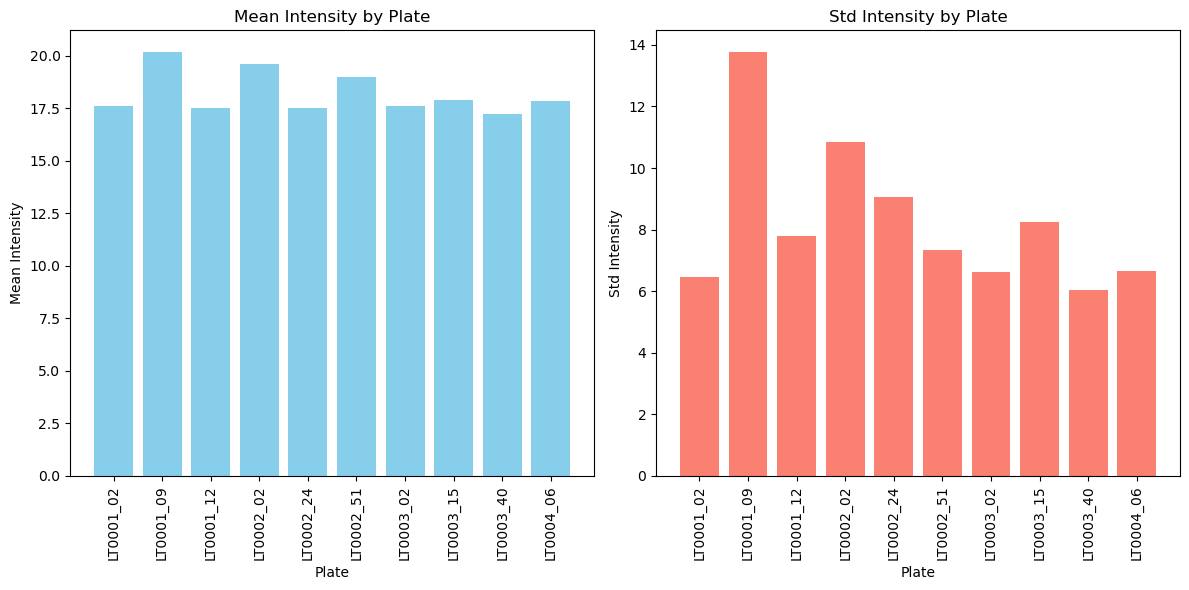

,plate,num_images,mean,std,min,max
5,LT0001_02,384,17.614428,6.454213,3.0,255.0
7,LT0001_09,384,20.205211,13.783738,0.0,255.0
0,LT0001_12,384,17.504826,7.788875,2.0,255.0
4,LT0002_02,384,19.633179,10.833485,0.0,255.0
2,LT0002_24,384,17.535171,9.067551,2.0,255.0
3,LT0002_51,384,18.975217,7.327585,4.0,255.0
1,LT0003_02,384,17.605699,6.636894,2.0,255.0
6,LT0003_15,367,17.883879,8.236989,0.0,255.0
9,LT0003_40,384,17.216046,6.052741,4.0,255.0
8,LT0004_06,384,17.850701,6.649014,2.0,255.0


In [2]:
# Example usage
plate_statistics = analyze_plates_statistics(
    data_dir="/proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/first_frames",
    show_hist=False,
    show_summary_plot=True
)

# Display the results as a table
display(plate_statistics)


Analyzing plate: LT0004_11 (383 images)
  Images processed: 383
  Mean intensity: 17.1785
  Std intensity:  5.5542
  Min intensity:  3.0000
  Max intensity:  255.0000

Analyzing plate: LT0004_47 (384 images)
  Images processed: 384
  Mean intensity: 14.2158
  Std intensity:  11.6602
  Min intensity:  0.0000
  Max intensity:  255.0000


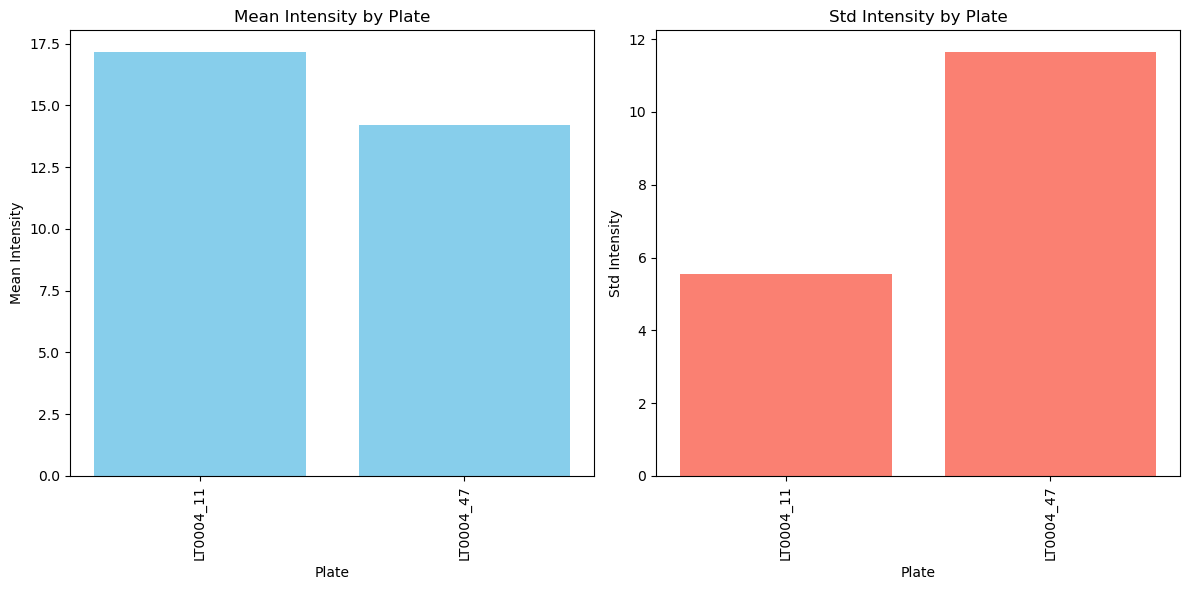

,plate,num_images,mean,std,min,max
0,LT0004_11,383,17.178482,5.554193,3.0,255.0
1,LT0004_47,384,14.215830,11.660208,0.0,255.0


: 

In [3]:
# Example usage
plate_statistics = analyze_plates_statistics(
    data_dir="/proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/val/first_frames",
    show_hist=False,
    show_summary_plot=True
)

# Display the results as a table
display(plate_statistics)